# Unit 5 - Financial Planning

In [195]:
# Initial imports
import os
import requests
import json
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [196]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [197]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_crypto = {"BTC":1.2, "ETH":5.3}

In [198]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [199]:
# Fetch current BTC price
# YOUR CODE HERE!
BTC_response_data = requests.get(btc_url)
BTC_response_content = BTC_response_data.content
BTC_data = BTC_response_data.json()
print (json.dumps(BTC_data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19443062,
            "total_supply": 19443062,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 29301.0,
                    "volume_24h": 5391749181,
                    "market_cap": 569182757709,
                    "percentage_change_1h": 0.105624817793137,
                    "percentage_change_24h": 0.0920791913902393,
                    "percentage_change_7d": -1.97654586760312,
                    "percent_change_1h": 0.105624817793137,
                    "percent_change_24h": 0.0920791913902393,
                    "percent_change_7d": -1.97654586760312
                }
            },
            "last_updated": 1690717782
        }
    },
    "metadata": {
        "timestamp": 1690717782,
        "num_cr

In [200]:

# Fetch current ETH price
# YOUR CODE HERE!
ETH_response_data = requests.get(eth_url)
ETH_response_content = ETH_response_data.content
ETH_data = ETH_response_data.json()
print (json.dumps(ETH_data, indent = 4))


{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 120181083,
            "total_supply": 120181083,
            "max_supply": 120181083,
            "quotes": {
                "USD": {
                    "price": 1874.88,
                    "volume_24h": 3368325227,
                    "market_cap": 225263111509,
                    "percentage_change_1h": 0.0350292281919038,
                    "percentage_change_24h": 0.167762298688423,
                    "percentage_change_7d": -0.0029962941979882,
                    "percent_change_1h": 0.0350292281919038,
                    "percent_change_24h": 0.167762298688423,
                    "percent_change_7d": -0.0029962941979882
                }
            },
            "last_updated": 1690717780
        }
    },
    "metadata": {
        "timestamp": 1690717780,


In [201]:

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc= my_crypto["BTC"]
my_eth= my_crypto["ETH"]
my_btc_value = BTC_data["data"]["1"]["quotes"]["USD"]["price"] * my_btc
my_eth_value = ETH_data["data"]["1027"]["quotes"]["USD"]["price"] * my_eth
print(f"BTC unit price is {my_btc_value}")
print(f"ETC unit price is {my_eth_value}")

BTC unit price is 35161.2
ETC unit price is 9936.864


In [202]:
my_btc= my_crypto["BTC"]
my_eth= my_crypto["ETH"]
print(f"my {my_btc} BTC and my {my_eth} ETH")

my 1.2 BTC and my 5.3 ETH


In [203]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $35161.20
The current value of your 5.3 ETH is $9936.86


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [204]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [205]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")


Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [206]:

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [207]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2023-07-28", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df
df_portfolio.head(5)

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2023-07-28 04:00:00+00:00,97.39,97.59,97.3102,97.56,7667973,27237,97.508638,AGG
2023-07-28 04:00:00+00:00,455.88,457.78,452.4918,456.92,79583623,525115,456.262095,SPY


In [208]:

# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])
df_portfolio



AGG                                              \
                            open   high      low  close   volume trade_count   
timestamp                                                                      
2023-07-28 04:00:00+00:00  97.39  97.59  97.3102  97.56  7667973       27237   

                                         SPY                            \
                                vwap    open    high       low   close   
timestamp                                                                
2023-07-28 04:00:00+00:00  97.508638  455.88  457.78  452.4918  456.92   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2023-07-28 04:00:00+00:00  79583623      525115  456.262095

In [209]:

AGG_close_price=df_portfolio["AGG"]["close"]
SPY_close_price=df_portfolio["SPY"]["close"]
Close_Price=pd.concat([AGG_close_price, SPY_close_price], axis=1, keys=['AGG','SPY'])
Close_Price

,AGG,SPY
timestamp,,
2023-07-28 04:00:00+00:00,97.56,456.92


In [210]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = Close_Price["AGG"][0]
spy_close_price = Close_Price["SPY"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $97.56
Current SPY closing price: $456.92


In [211]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22846.00
The current value of your 200 AGG shares is $19512.00


### Savings Health Analysis

In [212]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!
my_crypto_value = my_btc_value + my_eth_value
my_share_value = my_agg_value + my_spy_value
value = [my_crypto_value, my_share_value]
labels = ["crypto", "shares"]
# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(value, columns=["amount"], index=labels)

# Display savings DataFrame
display(df_savings)

,amount
crypto,45098.064
shares,42358.000


<AxesSubplot:title={'center':'Asset Portfolio Composition'}, ylabel='amount'>

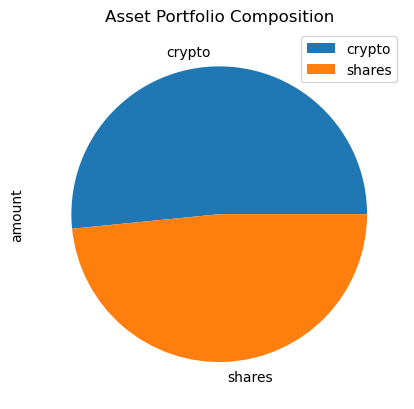

In [213]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="amount", title="Asset Portfolio Composition")

In [214]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
Total_savings = my_crypto_value + my_share_value

display(f"Peronsal total saving is $ {Total_savings}")

'Peronsal total saving is $ 87456.064'

In [215]:

# Validate saving health
# YOUR CODE HERE!

if emergency_fund < Total_savings:
    print("Congratulate you on having enough fund to cover the emergency needs!")

elif emergency_fund == Total_savings:
    print("Congratulate you on reaching the goal of covering the emergency fund!")

else:
    additional_fund = emergency_fund - Total_savings    
    print(f"I am sorry, but you need additional $ {additional_fund} to reach your emergency fund requirement.")


Congratulate you on having enough fund to cover the emergency needs!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [216]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-07-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-06-30', tz='America/New_York').isoformat()

In [222]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
ticker_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    
).df
ticker_data.head()


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2018-07-02 04:00:00+00:00,106.10,106.125,105.990,105.99,7159907,17760,106.032887,AGG
2018-07-03 04:00:00+00:00,106.03,106.210,106.025,106.21,2429478,10866,106.144191,AGG
2018-07-05 04:00:00+00:00,106.22,106.340,106.210,106.31,2739896,11075,106.278878,AGG
2018-07-06 04:00:00+00:00,106.41,106.450,106.320,106.42,2598654,10547,106.388113,AGG
2018-07-09 04:00:00+00:00,106.29,106.340,106.250,106.32,1926209,9300,106.299974,AGG


In [223]:

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG=ticker_data[ticker_data["symbol"]=="AGG"].drop("symbol", axis=1)
SPY=ticker_data[ticker_data["symbol"]=="SPY"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data=pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Display sample data
df_stock_data.head()

AGG                                     \
                             open     high      low   close   volume   
timestamp                                                              
2018-07-02 04:00:00+00:00  106.10  106.125  105.990  105.99  7159907   
2018-07-03 04:00:00+00:00  106.03  106.210  106.025  106.21  2429478   
2018-07-05 04:00:00+00:00  106.22  106.340  106.210  106.31  2739896   
2018-07-06 04:00:00+00:00  106.41  106.450  106.320  106.42  2598654   
2018-07-09 04:00:00+00:00  106.29  106.340  106.250  106.32  1926209   

                                                      SPY                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2018-07-02 04:00:00+00:00       17760  106.032887  269.51  272.04  269.240   
2018-07-03 04:00:00+00:00       10866  106.144191  272.87  272.98  270.420   
2018-07-05 04:00:00+00:00       11075  106.278878  272.17  273.18  270.960   
2018-07-06 04:00:00+00:00       10547  106.388113  273.14  275.84  272.715   
2018-07-09 04:00:00+00:00        9300  106.299974  276.55  277.96  276.500   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2018-07-02 04:00:00+00:00  271.84  63769156      279127  270.689557  
2018-07-03 04:00:00+00:00  270.88  42201071      180591  271.716151  
2018-07-05 04:00:00+00:00  273.02  57441049      260592  272.247814  
2018-07-06 04:00:00+00:00  275.36  66693896      269826  274.929843  
2018-07-09 04:00:00+00:00  277.90  51771719      212828  277.260701

In [225]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
num_sims=1000
MC=MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [226]:
# Printing the simulation input data
# YOUR CODE HERE!

MC.portfolio_data.head()

AGG                                     \
                             open     high      low   close   volume   
timestamp                                                              
2018-07-02 04:00:00+00:00  106.10  106.125  105.990  105.99  7159907   
2018-07-03 04:00:00+00:00  106.03  106.210  106.025  106.21  2429478   
2018-07-05 04:00:00+00:00  106.22  106.340  106.210  106.31  2739896   
2018-07-06 04:00:00+00:00  106.41  106.450  106.320  106.42  2598654   
2018-07-09 04:00:00+00:00  106.29  106.340  106.250  106.32  1926209   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-07-02 04:00:00+00:00       17760  106.032887          NaN  269.51   
2018-07-03 04:00:00+00:00       10866  106.144191     0.002076  272.87   
2018-07-05 04:00:00+00:00       11075  106.278878     0.000942  272.17   
2018-07-06 04:00:00+00:00       10547  106.388113     0.001035  273.14   
2018-07-09 04:00:00+00:00        9300  106.299974    -0.000940  276.55   

                                                                          \
                             high      low   close    volume trade_count   
timestamp                                                                  
2018-07-02 04:00:00+00:00  272.04  269.240  271.84  63769156      279127   
2018-07-03 04:00:00+00:00  272.98  270.420  270.88  42201071      180591   
2018-07-05 04:00:00+00:00  273.18  270.960  273.02  57441049      260592   
2018-07-06 04:00:00+00:00  275.84  272.715  275.36  66693896      269826   
2018-07-09 04:00:00+00:00  277.96  276.500  277.90  51771719      212828   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-07-02 04:00:00+00:00  270.689557          NaN  
2018-07-03 04:00:00+00:00  271.716151    -0.003531  
2018-07-05 04:00:00+00:00  272.247814     0.007900  
2018-07-06 04:00:00+00:00  274.929843     0.008571  
2018-07-09 04:00:00+00:00  277.260701     0.009224

In [227]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\luis.lu\Desktop\Fintech\Home Work - Challenges\Module 5\Module-5---API\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993815,1.004233,1.003017,0.995835,1.008654,0.998326,0.999381,0.999219,0.996877,0.994332,...,1.005650,1.002564,1.001671,1.002252,1.010614,1.009782,0.997071,0.998389,1.002656,0.996846
2,0.989937,1.007639,0.997746,1.000667,1.009332,0.998933,0.999362,1.002925,0.991162,1.002291,...,1.012214,0.993810,1.003607,0.994861,1.010394,1.006332,0.989382,1.007195,1.003213,1.001925
3,0.999388,1.020767,1.003116,1.003214,1.016945,1.008488,1.015660,0.994822,0.999857,0.992439,...,1.018409,0.998461,1.005703,0.996296,1.012712,1.002028,0.989117,1.000862,1.014856,0.996256
4,0.996881,1.017657,1.015737,0.999486,1.013726,1.012983,1.016572,0.980442,0.996158,0.992972,...,1.030406,1.002628,1.018834,0.990974,1.020082,1.001249,1.001220,0.998347,1.020536,0.992915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.655726,4.563230,3.015283,2.625323,8.714953,4.274092,3.947938,18.936526,1.762327,13.215706,...,9.782503,14.821413,5.572568,2.831361,7.843013,6.605136,10.626824,6.262585,8.213995,3.314354
7557,7.658225,4.565728,2.999782,2.634049,8.829746,4.295815,3.943740,18.905037,1.760362,13.123265,...,9.858705,14.846593,5.580380,2.827939,7.794369,6.553537,10.590223,6.233959,8.249101,3.308530
7558,7.706094,4.557400,2.987548,2.620820,8.859835,4.276823,3.937463,18.721274,1.766899,13.015939,...,9.794650,14.844150,5.612878,2.825180,7.739724,6.533656,10.593562,6.316242,8.308395,3.279991
7559,7.696792,4.570737,2.983423,2.634854,8.803338,4.303493,3.951234,18.954435,1.758680,13.094907,...,9.770465,14.900008,5.646174,2.817033,7.740072,6.587996,10.589006,6.348779,8.340359,3.262761


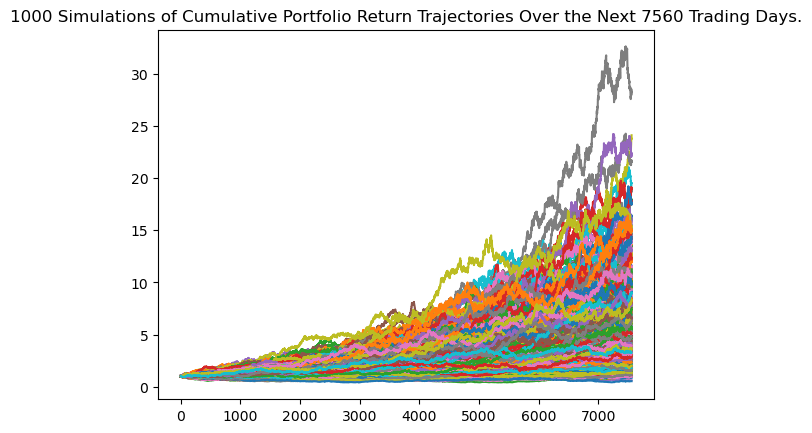

In [228]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC.plot_simulation()

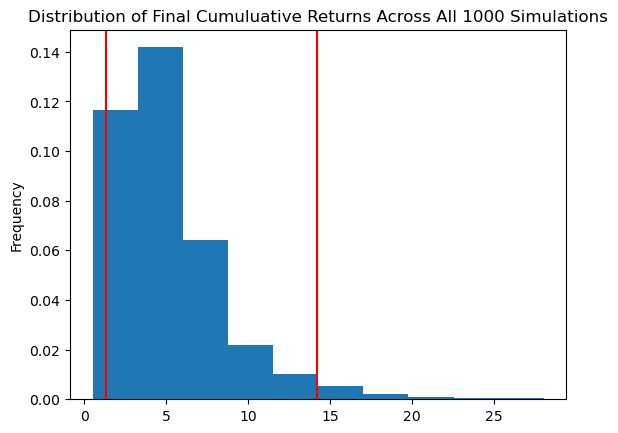

In [229]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC.plot_distribution()

### Retirement Analysis

In [231]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           1000.000000
mean               5.133378
std                3.339880
min                0.526895
25%                2.934518
50%                4.222147
75%                6.408307
max               28.032871
95% CI Lower       1.352168
95% CI Upper      14.211814
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [233]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
even_ci_lower = round(even_tbl[8]*15000,2)
even_ci_upper = round(even_tbl[9]*15000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $20282.53 and $213177.21


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [234]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
even_ci_lower = round(even_tbl[8]*30000,2)
even_ci_upper = round(even_tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $40565.05 and $426354.42


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [235]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC=MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*5
)

In [236]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\luis.lu\Desktop\Fintech\Home Work - Challenges\Module 5\Module-5---API\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999371,0.987213,1.010882,1.010921,1.005302,1.005716,0.999648,0.997854,1.001350,0.999305,...,0.989466,0.999498,0.993853,1.005191,0.995578,0.999032,0.992175,0.993566,0.998367,0.988325
2,1.019629,0.980066,1.010332,1.001285,1.011328,0.994349,0.997432,1.001776,1.001901,0.991157,...,0.999588,1.009592,0.992050,1.009239,0.998952,1.006085,0.987850,0.998584,0.999885,0.984085
3,1.011144,0.970748,1.008785,0.998394,1.008054,0.982767,1.005934,1.001205,1.002543,0.996379,...,0.998039,1.018116,0.993867,1.010375,0.988334,1.013955,0.984309,1.011290,1.001744,0.961081
4,1.014058,0.962957,1.018151,1.007000,1.013309,0.983251,1.008933,0.999691,0.995581,0.988231,...,0.995321,1.016850,1.000891,1.003276,0.994552,1.020746,0.995252,1.010219,1.006597,0.971361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.697907,1.494613,1.007942,1.115846,1.278122,1.609838,1.440737,1.580114,1.513408,1.645743,...,0.997684,1.797120,1.163460,0.938115,1.275314,2.074473,1.440340,1.063555,1.244847,0.902835
1257,1.691936,1.505169,1.016455,1.110495,1.284721,1.612267,1.448851,1.588482,1.516799,1.621313,...,0.996719,1.785004,1.177341,0.946482,1.280554,2.076216,1.445758,1.054546,1.262995,0.892734
1258,1.703434,1.504602,1.023089,1.119551,1.285503,1.616980,1.437883,1.573163,1.513088,1.632978,...,0.992424,1.790759,1.177073,0.947618,1.284577,2.061830,1.443162,1.060443,1.253599,0.887294
1259,1.696970,1.513491,1.017467,1.115931,1.291005,1.633031,1.445512,1.576347,1.512977,1.633196,...,0.997530,1.763567,1.169154,0.947047,1.280729,2.063706,1.444397,1.058838,1.262006,0.885967


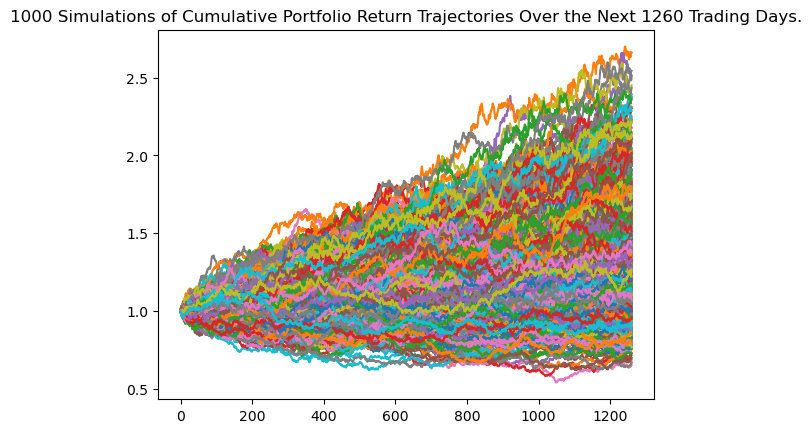

In [237]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC.plot_simulation()

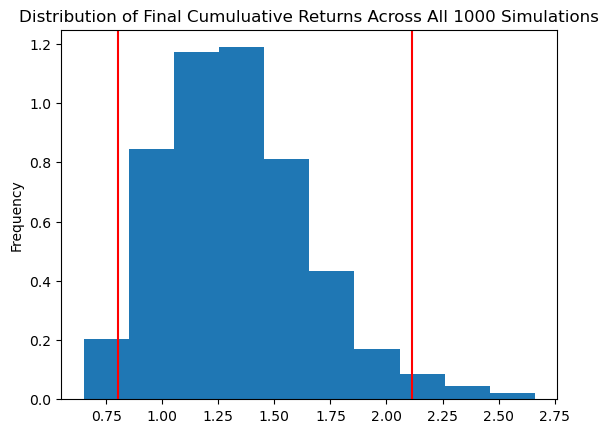

In [238]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC.plot_distribution()

In [239]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           1000.000000
mean               1.331556
std                0.328980
min                0.650488
25%                1.090921
50%                1.297380
75%                1.519485
max                2.661849
95% CI Lower       0.801757
95% CI Upper       2.111660
Name: 1260, dtype: float64


In [241]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
even_ci_lower_five = round(even_tbl[8]*15000,2)
even_ci_upper_five = round(even_tbl[9]*15000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower_five} and ${even_ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $12026.35 and $31674.89


### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC=MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = num_sims,
    num_trading_days = 252*10
)

In [242]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\luis.lu\Desktop\Fintech\Home Work - Challenges\Module 5\Module-5---API\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998945,0.991279,1.005231,0.992558,1.007562,0.999221,0.997090,0.994674,1.006037,1.001795,...,0.992845,1.004011,1.001591,0.988317,1.016672,1.000742,1.005290,0.998318,0.991415,0.995608
2,0.999316,0.994441,1.013997,0.996624,1.014595,0.989698,1.005395,0.992983,0.988979,0.991996,...,0.998535,1.002175,0.992476,0.994142,1.026520,0.997797,1.013112,1.006804,0.989844,0.991619
3,0.988634,1.002224,1.018168,1.000177,1.017756,0.995498,1.016117,1.001815,0.988833,0.986237,...,0.986170,1.001814,0.992423,0.995169,1.026393,0.996706,1.013261,1.013635,0.997090,1.006999
4,0.989070,0.999635,1.015622,1.008046,1.012701,0.993056,1.011866,1.006910,0.996202,0.981465,...,0.980101,0.993805,1.000921,0.991548,1.026626,0.998496,1.017818,1.020977,1.007410,1.005967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.232726,1.189282,1.327110,1.374260,1.125831,1.395355,1.212380,1.409889,0.911569,1.826155,...,1.070202,1.120250,1.259485,1.690926,1.159095,1.712609,1.265486,0.954547,1.236546,1.288179
1257,2.230538,1.185072,1.329278,1.369510,1.120392,1.396781,1.216496,1.423911,0.913730,1.837302,...,1.063984,1.130661,1.263113,1.691794,1.154990,1.718123,1.269237,0.953441,1.235315,1.277582
1258,2.268946,1.184565,1.332341,1.386203,1.114460,1.385595,1.206936,1.437235,0.917122,1.833749,...,1.072410,1.124701,1.269859,1.692697,1.150372,1.711768,1.273638,0.947252,1.237985,1.286757
1259,2.297147,1.183622,1.340486,1.394815,1.103027,1.387682,1.227808,1.431219,0.918470,1.834656,...,1.069910,1.120599,1.264534,1.701000,1.156831,1.706619,1.274399,0.950725,1.233102,1.292147


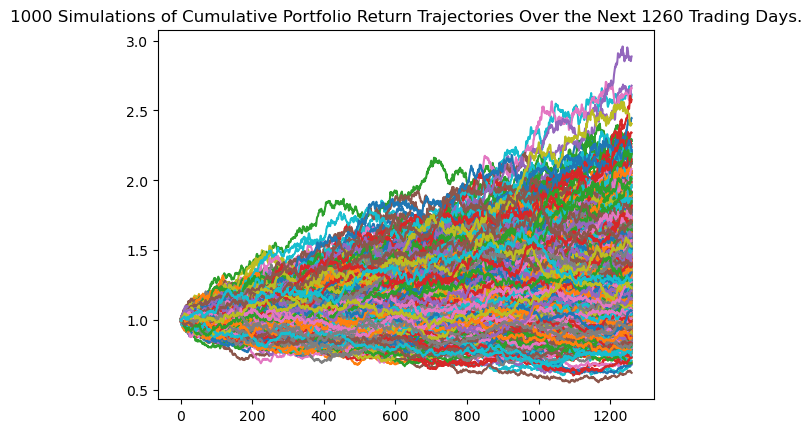

In [243]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot=MC.plot_simulation()

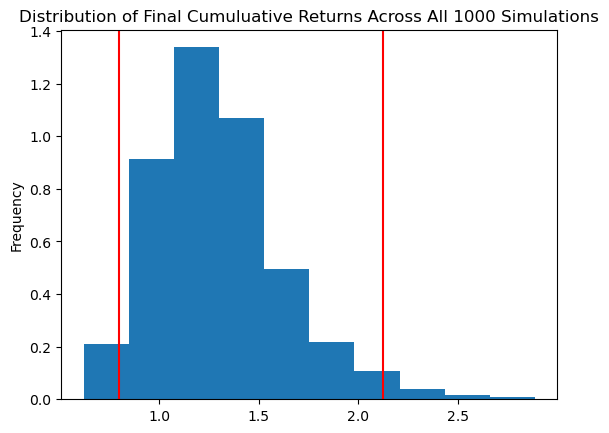

In [244]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC.plot_distribution()

In [245]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl = MC.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           1000.000000
mean               1.301306
std                0.326012
min                0.622790
25%                1.074294
50%                1.259352
75%                1.475230
max                2.886373
95% CI Lower       0.796280
95% CI Upper       2.124286
Name: 1260, dtype: float64


In [246]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000
even_ci_lower_ten = round(even_tbl[8]*15000,2)
even_ci_upper_ten = round(even_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${even_ci_lower_ten} and ${even_ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $11944.2 and $31864.29
